In [10]:
# Import standard libraries
import os
from contextlib import redirect_stdout

import sys
# append coeqwal packages to path
sys.path.append('./coeqwalpackage')

import numpy as np
import pandas as pd
import datetime as dt


In [12]:
# Import custom libraries
from coeqwalpackage.metrics import *
import cqwlutils as cu
import plotting as pu


## Define contol file name

In [15]:
CtrlFile = 'CalSim3DataExtractionInitFile.xlsx'
CtrlTab = 'Init'

## Read from control file

In [18]:
DssListFile, DssListTab, DssListPath, DssNamesOutPath, DssIndicesOutPath, DssDirsOutPath, VarListPath, VarListFile, VarListTab, VarOutPath, DataOutPath, ConvertDataOutPath, ExtractionSubPath, ModelSubPath, GroupDataDirPath, ScenarioDir, DssMin, DssMax, DirMin, DirMax, IndexMin, IndexMax, StartMin, StartMax, EndMin, EndMax, VarMin, VarMax = cu.read_init_file(CtrlFile, CtrlTab)


## Continue with original notebook

### Read in Data

In [22]:
df, dss_names = read_in_df(ConvertDataOutPath,DssNamesOutPath)
df.head()

A                    CALSIM                                   \
B          COREQSACDV_s0001 CO_EC_MONTH_s0001 C_AMR004_s0001   
C                      FLOW          SALINITY        CHANNEL   
D                      1MON              1MON           1MON   
E                    L2020A            L2020A         L2020A   
F                  PER-AVER          PER-AVER       PER-AVER   
Units                   CFS          UMHOS/CM            CFS   
1921-10-31           0.0000         2173.8489      2164.7295   
1921-11-30           0.0000         2621.5984      2206.7960   
1921-12-31        4017.6848         5590.7207      2024.8998   
1922-01-31           0.0000        10744.2570      1704.5483   
1922-02-28           0.0000         3148.9802      5005.4834   

A                                                                      \
B                C_AMR004_ADD_s0001 C_CAA003_s0001 C_CAA003_CVP_s0001   
C          FLOW-ADDITIONAL-INSTREAM        CHANNEL      FLOW-DELIVERY   
D                              1MON           1MON               1MON   
E                            L2020A         L2020A             L2020A   
F                          PER-AVER       PER-AVER           PER-AVER   
Units                           CFS            CFS                CFS   
1921-10-31                1664.7295      2128.5490             0.0000   
1921-11-30                1706.7959      5519.2420          2043.4584   
1921-12-31                1524.8998      7353.6895             0.0000   
1922-01-31                1454.5483      2900.1606             0.0000   
1922-02-28                4755.4834      4465.3560             0.0000   

A                                                                           \
B          C_CAA003_SWP_s0001 C_CHW017_s0001 C_CLV004_s0001 C_DMC000_s0001   
C               FLOW-DELIVERY        CHANNEL        CHANNEL        CHANNEL   
D                        1MON           1MON           1MON           1MON   
E                      L2020A         L2020A         L2020A         L2020A   
F                    PER-AVER       PER-AVER       PER-AVER       PER-AVER   
Units                     CFS            CFS            CFS            CFS   
1921-10-31          1960.6274       0.000000       0.958765       801.8536   
1921-11-30          3475.7837       0.084717       0.046577      4600.0000   
1921-12-31          7353.6895       6.398305     179.059230      4600.0000   
1922-01-31          2900.1606       6.022529      39.173940      4350.2407   
1922-02-28          4465.3560     304.058170    1826.492400      4600.0000   

A           ...                                                \
B           ... DEL_CVP_PMI_N_s0010 DEL_CVP_PMI_N_WAMER_s0010   
C           ...        DELIVERY-CVP              DELIVERY-CVP   
D           ...                1MON                      1MON   
E           ...              L2020A                    L2020A   
F           ...            PER-AVER                  PER-AVER   
Units       ...                 TAF                       TAF   
1921-10-31  ...            1.720302                 12.624462   
1921-11-30  ...            1.002579                  8.090725   
1921-12-31  ...            0.833823                  7.213113   
1922-01-31  ...            0.765210                  6.661297   
1922-02-28  ...            0.694830                  6.249593   

A                                                                       \
B          DEL_CVP_PMI_S_s0010 DEL_CVP_PRF_N_s0010 DEL_CVP_PRF_S_s0010   
C                 DELIVERY-CVP        DELIVERY-CVP        DELIVERY-CVP   
D                         1MON                1MON                1MON   
E                       L2020A              L2020A              L2020A   
F                     PER-AVER            PER-AVER            PER-AVER   
Units                      TAF                 TAF                 TAF   
1921-10-31           12.397073           23.086980           27.056122   
1921-11-30           15.509835           15.

In [24]:
add_water_year_column(df).head()

A                    CALSIM                                   \
B          COREQSACDV_s0001 CO_EC_MONTH_s0001 C_AMR004_s0001   
C                      FLOW          SALINITY        CHANNEL   
D                      1MON              1MON           1MON   
E                    L2020A            L2020A         L2020A   
F                  PER-AVER          PER-AVER       PER-AVER   
Units                   CFS          UMHOS/CM            CFS   
1921-10-31           0.0000         2173.8489      2164.7295   
1921-11-30           0.0000         2621.5984      2206.7960   
1921-12-31        4017.6848         5590.7207      2024.8998   
1922-01-31           0.0000        10744.2570      1704.5483   
1922-02-28           0.0000         3148.9802      5005.4834   

A                                                                      \
B                C_AMR004_ADD_s0001 C_CAA003_s0001 C_CAA003_CVP_s0001   
C          FLOW-ADDITIONAL-INSTREAM        CHANNEL      FLOW-DELIVERY   
D                              1MON           1MON               1MON   
E                            L2020A         L2020A             L2020A   
F                          PER-AVER       PER-AVER           PER-AVER   
Units                           CFS            CFS                CFS   
1921-10-31                1664.7295      2128.5490             0.0000   
1921-11-30                1706.7959      5519.2420          2043.4584   
1921-12-31                1524.8998      7353.6895             0.0000   
1922-01-31                1454.5483      2900.1606             0.0000   
1922-02-28                4755.4834      4465.3560             0.0000   

A                                                                           \
B          C_CAA003_SWP_s0001 C_CHW017_s0001 C_CLV004_s0001 C_DMC000_s0001   
C               FLOW-DELIVERY        CHANNEL        CHANNEL        CHANNEL   
D                        1MON           1MON           1MON           1MON   
E                      L2020A         L2020A         L2020A         L2020A   
F                    PER-AVER       PER-AVER       PER-AVER       PER-AVER   
Units                     CFS            CFS            CFS            CFS   
1921-10-31          1960.6274       0.000000       0.958765       801.8536   
1921-11-30          3475.7837       0.084717       0.046577      4600.0000   
1921-12-31          7353.6895       6.398305     179.059230      4600.0000   
1922-01-31          2900.1606       6.022529      39.173940      4350.2407   
1922-02-28          4465.3560     304.058170    1826.492400      4600.0000   

A           ...                                                \
B           ... DEL_CVP_PMI_N_WAMER_s0010 DEL_CVP_PMI_S_s0010   
C           ...              DELIVERY-CVP        DELIVERY-CVP   
D           ...                      1MON                1MON   
E           ...                    L2020A              L2020A   
F           ...                  PER-AVER            PER-AVER   
Units       ...                       TAF                 TAF   
1921-10-31  ...                 12.624462           12.397073   
1921-11-30  ...                  8.090725           15.509835   
1921-12-31  ...                  7.213113           15.185120   
1922-01-31  ...                  6.661297           10.606127   
1922-02-28  ...                  6.249593            5.436735   

A                                                                       \
B          DEL_CVP_PRF_N_s0010 DEL_CVP_PRF_S_s0010 DEL_CVP_PSC_N_s0010   
C                 DELIVERY-CVP        DELIVERY-CVP        DELIVERY-CVP   
D                         1MON                1MON                1MON   
E                       L2020A              L2020A              L2020A   
F                     PER-AVER            PER-AVER            PER-AVER   
Units                      TAF                 TAF                 TAF   
1921-10-31           23.086980           27.056122           32.287554   
1921-11-30           15.483716           18.

In [26]:
# TO BE COMPLETED: Add wateryear type based on the Sacramento River May WYT

In [28]:
# Create subset df with Shasta
df_shasta = create_subset_var(df, 'S_SHSTA_')
df_shasta

A                 CALSIM                                            \
B          S_SHSTA_s0001 S_SHSTA_s0002 S_SHSTA_s0003 S_SHSTA_s0004   
C                STORAGE       STORAGE       STORAGE       STORAGE   
D                   1MON          1MON          1MON          1MON   
E                 L2020A        L2020A        L2020A        L2020A   
F               PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                TAF           TAF           TAF           TAF   
1921-10-31     3057.8250     3055.7650     3052.4030     3049.2104   
1921-11-30     2908.5920     2901.6628     2907.8103     2880.3591   
1921-12-31     3076.5317     3074.3784     3153.1946     3126.2263   
1922-01-31     3204.3298     3165.3650     3258.3555     3224.1177   
1922-02-28     3585.4524     3590.3950     3786.1345     3742.7375   
..                   ...           ...           ...           ...   
2021-05-31     2629.4194     2541.8994     1816.6152     1706.4473   
2021-06-30     2295.8257     2200.0842     1473.1182     1300.8160   
2021-07-31     1849.7489     1761.1489      721.9321      650.0000   
2021-08-31     1583.3944     1483.6007      554.4955      550.0000   
2021-09-30     1431.0388     1327.8604      550.0000      550.0000   

A                                                                   \
B          S_SHSTA_s0005 S_SHSTA_s0006 S_SHSTA_s0007 S_SHSTA_s0008   
C                STORAGE       STORAGE       STORAGE       STORAGE   
D                   1MON          1MON          1MON          1MON   
E                 L2020A        L2020A        L2020A        L2020A   
F               PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units                TAF           TAF           TAF           TAF   
1921-10-31     3045.7935     2739.6995     2739.6995     2739.6995   
1921-11-30     2902.9326     2642.8274     2642.8274     2642.8274   
1921-12-31     3141.3110     2815.1300     2815.1300     2815.1300   
1922-01-31     3231.2770     2947.1340     2947.1340     2947.1340   
1922-02-28     3732.1300     3334.8300     3334.8300     3334.8300   
..                   ...           ...           ...           ...   
2021-05-31     1352.7518           NaN           NaN           NaN   
2021-06-30      650.0000           NaN           NaN           NaN   
2021-07-31      550.0000           NaN           NaN           NaN   
2021-08-31      550.0000           NaN           NaN           NaN   
2021-09-30      550.0000           NaN           NaN           NaN   

A                                       
B          S_SHSTA_s0009 S_SHSTA_s0010  
C                STORAGE       STORAGE  
D                   1MON          1MON  
E                 L2020A        L2020A  
F               PER-AVER      PER-AVER  
Units                TAF           TAF  
1921-10-31     2739.6995     2739.6995  
1921-11-30     2642.8274     2642.8274  
1921-12-31     2815.1300     2815.1300  
1922-01-31     2947.1340     2947.1340  
1922-02-28     3334.8300     3334.8300  
..                   ...           ...  
2021-05-31           NaN           NaN  
2021-06-30           NaN           NaN  
2021-07-31           NaN           NaN  
2021-08-31           NaN           NaN  
2021-09-30           NaN           NaN  

[1200 rows x 10 columns]

In [30]:
# Create subset with variable selected also based on units
DEL_CVP_TOTAL_N_df = create_subset_unit(df, "DEL_CVP_TOTAL_N", units = "TAF")
DEL_CVP_TOTAL_N_df


A                         CALSIM                                              \
B          DEL_CVP_TOTAL_N_s0001 DEL_CVP_TOTAL_N_s0002 DEL_CVP_TOTAL_N_s0003   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                         L2020A                L2020A                L2020A   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        TAF                   TAF                   TAF   
1921-10-31            107.533655            107.740155            107.558084   
1921-11-30             21.197421             21.306743             21.374652   
1921-12-31             10.088497             10.157799             10.148276   
1922-01-31              6.855971              6.865725              6.890145   
1922-02-28              2.584589              2.639966              2.703884   
..                           ...                   ...                   ...   
2021-05-31            335.451427            335.451427            335.035500   
2021-06-30            316.194405            316.194405            316.505457   
2021-07-31            354.612014            354.612014            354.132375   
2021-08-31            258.530385            258.530385            258.305330   
2021-09-30            123.398173            123.398173            104.523530   

A                                                                             \
B          DEL_CVP_TOTAL_N_s0004 DEL_CVP_TOTAL_N_s0005 DEL_CVP_TOTAL_N_s0006   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                         L2020A                L2020A                L2020A   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        TAF                   TAF                   TAF   
1921-10-31            107.765827            107.951981             75.641426   
1921-11-30             21.413903             21.454780             21.271095   
1921-12-31             10.163561             10.182879             10.199366   
1922-01-31              6.894429              6.900446              6.977081   
1922-02-28              2.743383              2.784409              2.764455   
..                           ...                   ...                   ...   
2021-05-31            335.151004            335.371311                   NaN   
2021-06-30            316.362460            315.909286                   NaN   
2021-07-31            354.186732            342.561184                   NaN   
2021-08-31            242.250098            242.302881                   NaN   
2021-09-30            103.944788            103.887422                   NaN   

A                                                                             \
B          DEL_CVP_TOTAL_N_s0007 DEL_CVP_TOTAL_N_s0008 DEL_CVP_TOTAL_N_s0009   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                         L2020A                L2020A                L2020A   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        TAF                   TAF                   TAF   
1921-10-31             75.641426             75.641426             75.641426   
1921-11-30             21.271095             21.271095             21.271095   
1921-12-31             10.199366             10.199366             10.199366   
1922-01-31              6.977081              6.977081              6.977081   
1922-02-28              2.764455              2.764455              2.764455   
..                           ...                   ...                   ...   
2021-05-31                   NaN                   NaN                   NaN  

In [38]:
# Compute the april storage in Shasta by year
shasta_ann_apr_storage = compute_annual_means(df, 'S_SHSTA_', months = [4])
shasta_ann_apr_storage

A                CALSIM                                            \
B         S_SHSTA_s0001 S_SHSTA_s0002 S_SHSTA_s0003 S_SHSTA_s0004   
C               STORAGE       STORAGE       STORAGE       STORAGE   
D                  1MON          1MON          1MON          1MON   
E                L2020A        L2020A        L2020A        L2020A   
F              PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units               TAF           TAF           TAF           TAF   
WaterYear                                                           
1922          4552.1000     4552.1000     4552.1000     4552.1000   
1923          4263.1230     4239.9090     4171.1353     4010.7420   
1924          2834.6250     2546.8657     2359.4510     2438.9860   
1925          3846.4575     3557.0237     3232.7852     3108.3752   
1926          3872.9970     3687.7880     3290.8270     2963.1448   
..                  ...           ...           ...           ...   
2017          4165.1480     4165.1480     4210.2896     4239.0938   
2018          4286.1520     4286.6790     4037.6956     3951.1702   
2019          4133.6480     4133.6480     4207.5786     4244.5930   
2020          3903.6770     3889.9150     3591.4397     3359.6600   
2021          2878.8599     2800.9814     2116.3580     2018.0125   

A                                                                  \
B         S_SHSTA_s0005 S_SHSTA_s0006 S_SHSTA_s0007 S_SHSTA_s0008   
C               STORAGE       STORAGE       STORAGE       STORAGE   
D                  1MON          1MON          1MON          1MON   
E                L2020A        L2020A        L2020A        L2020A   
F              PER-AVER      PER-AVER      PER-AVER      PER-AVER   
Units               TAF           TAF           TAF           TAF   
WaterYear                                                           
1922          4552.1000     4366.9140     4366.9140     4366.9140   
1923          3992.2300     4097.5460     4074.9663     4068.6558   
1924          2439.0420     2785.0469     2761.5180     2755.7869   
1925          2945.7876     3908.2537     3887.1030     3880.6790   
1926          2621.2085     4112.0140     4029.1260     4028.1350   
..                  ...           ...           ...           ...   
2017          4267.4517           NaN           NaN           NaN   
2018          3631.6040           NaN           NaN           NaN   
2019          4278.1040           NaN           NaN           NaN   
2020          3165.3376           NaN           NaN           NaN   
2021          1673.4883           NaN           NaN           NaN   

A                                      
B         S_SHSTA_s0009 S_SHSTA_s0010  
C               STORAGE       STORAGE  
D                  1MON          1MON  
E                L2020A        L2020A  
F              PER-AVER      PER-AVER  
Units               TAF           TAF  
WaterYear                              
1922          4366.9140     4366.9140  
1923          4068.6145     4067.6423  
1924          2751.9968     2739.6897  
1925          3876.3730     3862.2240  
1926          4010.6917     3999.5007  
..                  ...           ...  
2017                NaN           NaN  
2018                NaN           NaN  
2019                NaN           NaN  
2020                NaN           NaN  
2021                NaN           NaN  

[100 rows x 10 columns]

In [40]:
# Compute mean storage in Shasta in Study S_0005
compute_mean(df, 'S_SHSTA', study_lst=[5], units='TAF')

3859.922848083333

In [42]:
# Compute mean April storage in Shasta in Study S_0005
compute_mean(df, 'S_SHSTA', study_lst=[5], units='TAF', months=[4])

4473.314610999999

In [44]:
# Shasta Annual Avg.
shasta_ann_avg_df = ann_avg(df, dss_names, "S_SHSTA_")
shasta_ann_avg_df

,Ann_Avg_S_SHSTA_TAF
s0001,3332.749387
s0002,3219.136684
s0003,2952.814926
s0004,2820.612387
s0005,2742.590176
s0006,3304.255850
s0007,3318.201751
s0008,3317.468594
s0009,3311.085383
s0010,3310.812896


In [46]:
# Shasta Annual 10th percentile
shasta_10_pct = ann_percentile(df, dss_names, 0.1, "S_SHSTA_", "10per_S_SHSTA_TAF")
shasta_10_pct

,10per_S_SHSTA_TAF
s0001,2479.462915
s0002,2160.045123
s0003,1649.779860
s0004,1495.775345
s0005,1404.730902
s0006,2255.066334
s0007,2275.911776
s0008,2278.674590
s0009,2209.666458
s0010,2223.402485


In [48]:
# Shasta April Avg
shasta_apr_avg = mnth_avg(df, dss_names, "S_SHSTA_", 4)
shasta_apr_avg

,Apr_Avg_S_SHSTA_TAF
s0001,4037.991051
s0002,3920.254867
s0003,3711.537404
s0004,3592.096895
s0005,3511.278046
s0006,4035.944251
s0007,4044.659226
s0008,4044.682619
s0009,4038.165765
s0010,4038.121174


In [50]:
# Shasta all month Avg's
shasta_moy_avgs = moy_avgs(df, "S_SHSTA_", dss_names)
shasta_moy_avgs

,Month,moy_Avg_S_SHSTA__TAF
0,Jan,3047.855855
1,Feb,3282.301460
2,Mar,3615.081786
3,Apr,3897.473130
4,May,3893.092351
5,Jun,3625.384985
6,Jul,3128.507466
7,Aug,2812.072178
8,Sep,2662.293247
9,Oct,2615.012947


In [52]:
# Shasta April 10th percentile
shasta_apr_10_pct = mnth_percentile(df, dss_names, 0.1, "S_SHSTA_", "S_SHASTA_10_pct", 4)
shasta_apr_10_pct

,Apr_S_SHASTA_10_pct_TAF
s0001,3048.05414
s0002,2789.40650
s0003,2347.35942
s0004,2010.68660
s0005,1836.76023
s0006,2802.39584
s0007,2892.49537
s0008,2868.78226
s0009,2833.09660
s0010,2832.04305


In [54]:
# DEL_CVP_TOTAL_N annual totals
DEL_CVP_TOTAL_N_ann_totals = annual_totals(df, "DEL_CVP_TOTAL_N", "TAF")
DEL_CVP_TOTAL_N_ann_totals

A                    CALSIM                                              \
B     DEL_CVP_TOTAL_N_s0001 DEL_CVP_TOTAL_N_s0002 DEL_CVP_TOTAL_N_s0003   
C              DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                      1MON                  1MON                  1MON   
E                    L2020A                L2020A                L2020A   
F                  PER-AVER              PER-AVER              PER-AVER   
Units                   TAF                   TAF                   TAF   
Year                                                                      
1921             138.819574            139.204697            139.081012   
1922            2186.502019           2187.479108           2223.502800   
1923            2089.012078           2063.394167           2023.461579   
1924            1648.562421           1650.236462           1626.779622   
1925            2018.467788           1963.850644           1916.316692   
..                      ...                   ...                   ...   
2017            2160.125368           2160.120185           2185.662273   
2018            2154.654429           2154.654659           2094.816300   
2019            2086.561948           2086.561948           2097.889247   
2020            2007.911382           2007.822637           1993.711235   
2021            1517.584015           1517.583314           1499.768975   

A                                                                        \
B     DEL_CVP_TOTAL_N_s0004 DEL_CVP_TOTAL_N_s0005 DEL_CVP_TOTAL_N_s0006   
C              DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                      1MON                  1MON                  1MON   
E                    L2020A                L2020A                L2020A   
F                  PER-AVER              PER-AVER              PER-AVER   
Units                   TAF                   TAF                   TAF   
Year                                                                      
1921             139.343290            139.589640            107.111887   
1922            2229.291155           2234.268843           2057.001357   
1923            1982.268126           1961.598319           1973.584966   
1924            1610.658131           1610.243046           1630.900675   
1925            1885.456264           1846.414411           1751.233525   
..                      ...                   ...                   ...   
2017            2197.340457           2201.691887              0.000000   
2018            2073.412882           2022.632518              0.000000   
2019            2102.344548           2106.693235              0.000000   
2020            1696.990704           1654.127173              0.000000   
2021            1482.272019           1470.967022              0.000000   

A                                                                        \
B     DEL_CVP_TOTAL_N_s0007 DEL_CVP_TOTAL_N_s0008 DEL_CVP_TOTAL_N_s0009   
C              DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                      1MON                  1MON                  1MON   
E                    L2020A                L2020A                L2020A   
F                  PER-AVER              PER-AVER              PER-AVER   
Units                   TAF                   TAF                   TAF   
Year                                                                      
1921             107.111887            107.111887            107.111887   
1922            2064.819961           2057.001669           2060.186965   
1923            1976.145817           1976.492042           1976.183360   
1924            1631.937609           1631.295708           1630.864130   
1925            1742.368181           1742.373619           1749.635007   
..                      ...                   ...                   ...   
2017               0.000000              0.000000              0.000000   
2018               0.00

In [58]:
# Calculate exceedance probabilities
exceedance_df = calculate_exceedance_probabilities(df)
exceedance_df

F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\metrics.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exceedance_df[column] = exceedance_probs.reindex(df.index)
F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\metrics.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  exceedance_df[column] = exceedance_probs.reindex(df.index)
F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\metrics.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

CALSIM                                   \
           COREQSACDV_s0001 CO_EC_MONTH_s0001 C_AMR004_s0001   
                       FLOW          SALINITY        CHANNEL   
                       1MON              1MON           1MON   
                     L2020A            L2020A         L2020A   
                   PER-AVER          PER-AVER       PER-AVER   
                        CFS          UMHOS/CM            CFS   
1921-10-31         0.012490          0.542881       0.512073   
1921-11-30         0.831807          0.457952       0.502082   
1921-12-31         0.001665          0.241465       0.545379   
1922-01-31         0.672773          0.024979       0.637802   
1922-02-28         0.671940          0.408826       0.185679   
..                      ...               ...            ...   
2021-05-31         0.337219          0.328893       0.936719   
2021-06-30         0.336386          0.209825       0.606162   
2021-07-31         0.335554          0.135720       0.621982   
2021-08-31         0.334721          0.121565       0.590341   
2021-09-30         0.999167          0.097419       0.990841   

                                                                       \
                 C_AMR004_ADD_s0001 C_CAA003_s0001 C_CAA003_CVP_s0001   
           FLOW-ADDITIONAL-INSTREAM        CHANNEL      FLOW-DELIVERY   
                               1MON           1MON               1MON   
                             L2020A         L2020A             L2020A   
                           PER-AVER       PER-AVER           PER-AVER   
                                CFS            CFS                CFS   
1921-10-31                 0.548709       0.637802           0.297252   
1921-11-30                 0.537052       0.273106           0.004163   
1921-12-31                 0.580350       0.022481           0.692756   
1922-01-31                 0.605329       0.464613           0.691923   
1922-02-28                 0.184846       0.320566           0.691091   
..                              ...            ...                ...   
2021-05-31                 0.921732       0.940050           0.376353   
2021-06-30                 0.567860       0.977519           0.375520   
2021-07-31                 0.587011       0.850958           0.374688   
2021-08-31                 0.552873       0.947544           0.373855   
2021-09-30                 0.984180       0.891757           0.999167   

                                                                            \
           C_CAA003_SWP_s0001 C_CHW017_s0001 C_CLV004_s0001 C_DMC000_s0001   
                FLOW-DELIVERY        CHANNEL        CHANNEL        CHANNEL   
                         1MON           1MON           1MON           1MON   
                       L2020A         L2020A         L2020A         L2020A   
                     PER-AVER       PER-AVER       PER-AVER       PER-AVER   
                          CFS            CFS            CFS            CFS   
1921-10-31           0.675271       0.768526       0.685262       0.975021   
1921-11-30           0.376353       0.459617       0.750208       0.036636   
1921-12-31           0.022481       0.144879       0.140716       0.248127   
1922-01-31           0.452956       0.151540       0.230641       0.297252   
1922-02-28           0.303913       0.034971       0.018318       0.246461   
..                        ...            ...            ...            ...   
2021-05-31           0.917569       0.549542       0.583680       0.883430   
2021-06-30           0.941715       0.632806       0.507910       0.947544   
2021-07-31           0.940883       0.699417       0.442964       0.941715   
2021-08-31           0.940050       0.701082       0.637802       0.960033   
2021-09-30           0.995837       0.999167       0.999167       0.875104   

            ...                                                \
            ... DEL_CVP_PMI_N_s0010 DEL_CVP_PMI_N_WAMER_s0010   
            ...   

### Get time stamp

In [61]:
date_time = dt.datetime.now()
date_time_str = date_time.strftime("%m-%d-%Y_%H%M%S")

### Get metrics and plotting paths and make directories if needed

In [64]:
metrics_path = GroupDataDirPath + "/metrics_output"
if not os.path.exists(metrics_path):
    os.makedirs(metrics_path)

plots_path = GroupDataDirPath + "/plots_output"
if not os.path.exists(plots_path):
    os.makedirs(plots_path)
    

### Write metrics

In [67]:
# concatenating single metric dataframes with same index
selected_metrics = pd.concat([
    shasta_10_pct,
    shasta_apr_avg,
    shasta_apr_10_pct
], axis=1)

# write out single metrics in one csv and multiindex dataframes in another csv
selected_metrics.to_csv(metrics_path + "/SelectedMetrics_" + date_time_str + ".csv")

### Write exceedance probabilities

In [70]:
# ex. how to write out one dataframe to it's own csv
exceedance_df.to_csv(metrics_path + "/ExceedanceProbabilities_" + date_time_str + ".csv")

## Plotting Examples

### plot Shasta single time series

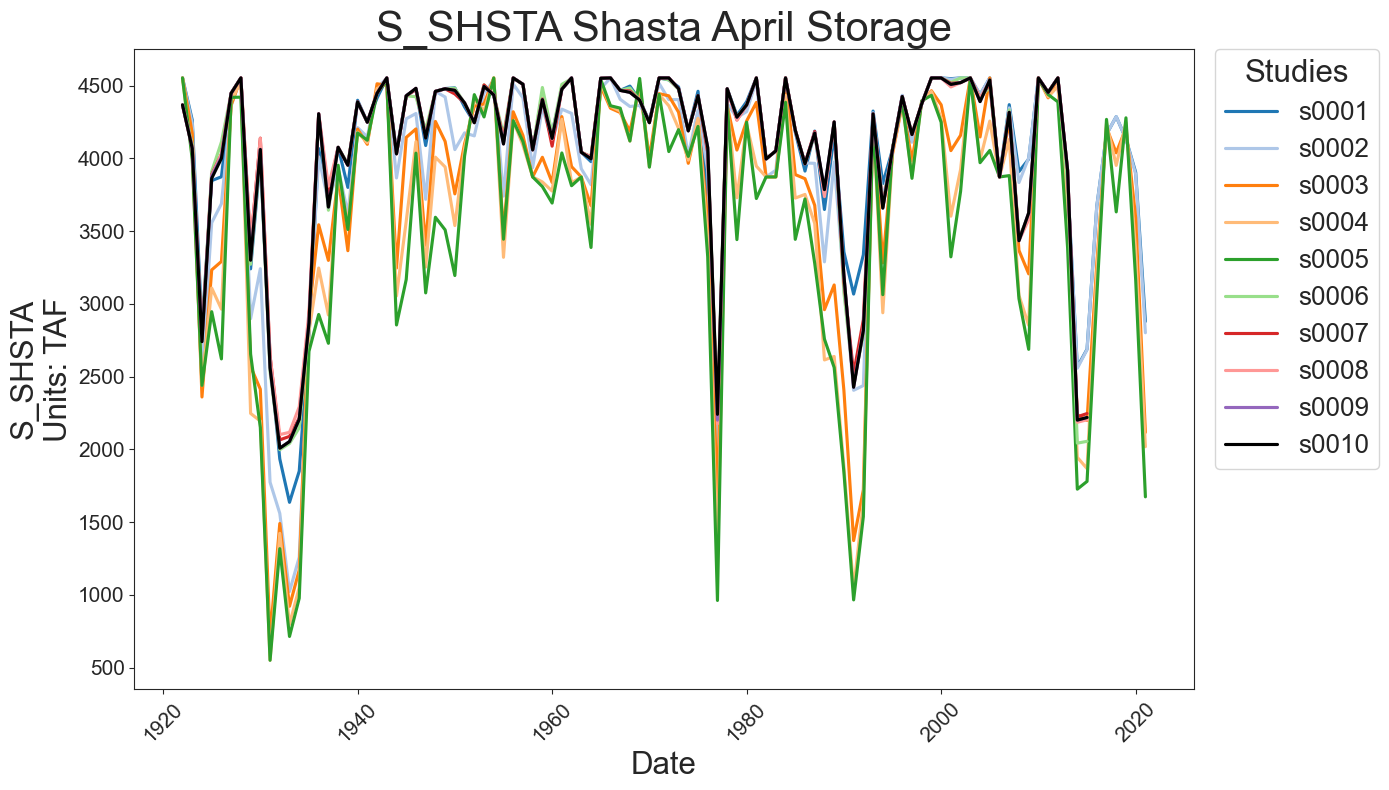

In [87]:
pu.plot_ts(shasta_ann_apr_storage, pTitle = 'Shasta April Storage', xLab = 'Date', lTitle = 'Studies', fTitle = 'shasta_apr_storage', pSave = True, fPath = plots_path)

### plot Shasta month of year average

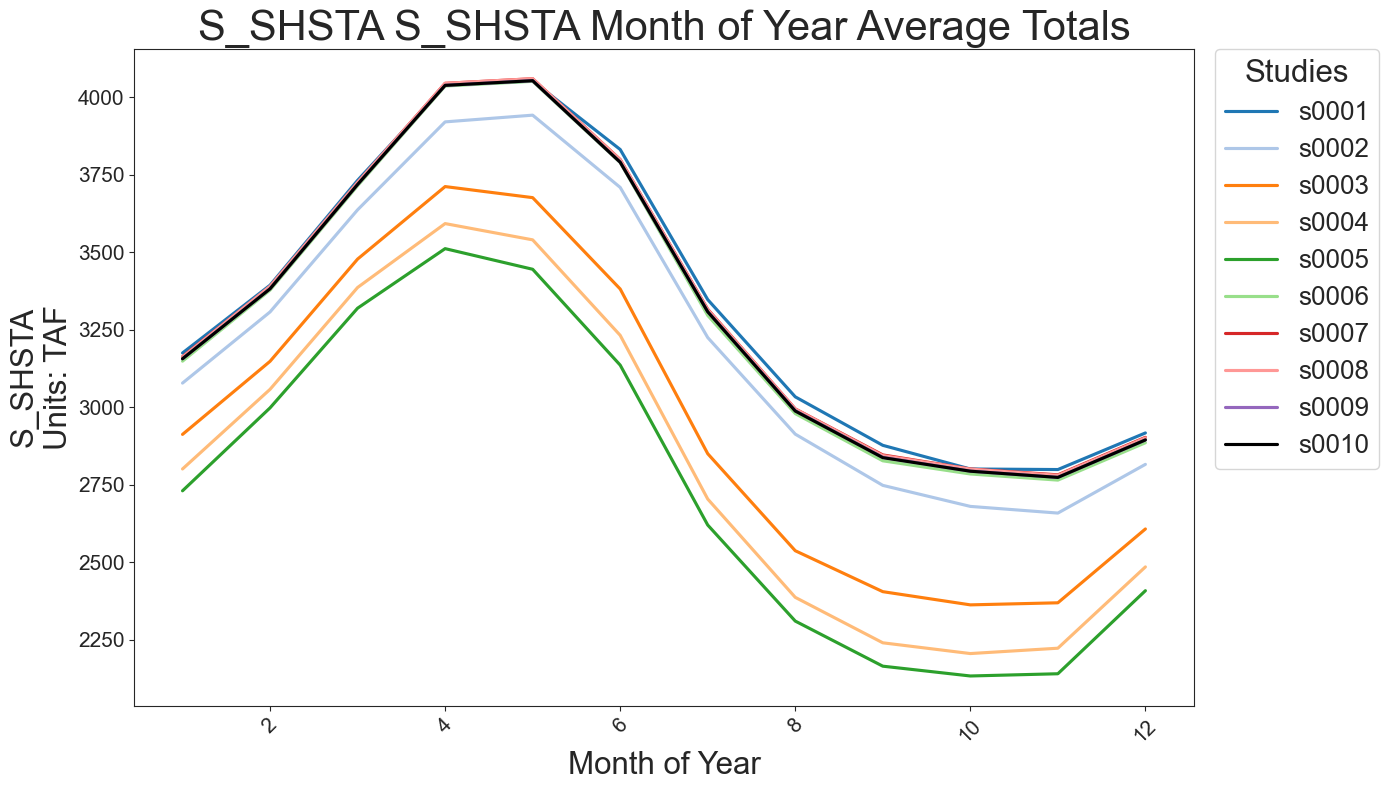

In [75]:
pu.plot_moy_averages(df_shasta, xLab = 'Month of Year', pTitle = 'S_SHSTA Month of Year Average Totals', lTitle = 'Studies', fTitle = 'S_SHSTA_moy_avg', pSave = True, fPath = plots_path)

### plot Shasta April exceedance probabillity

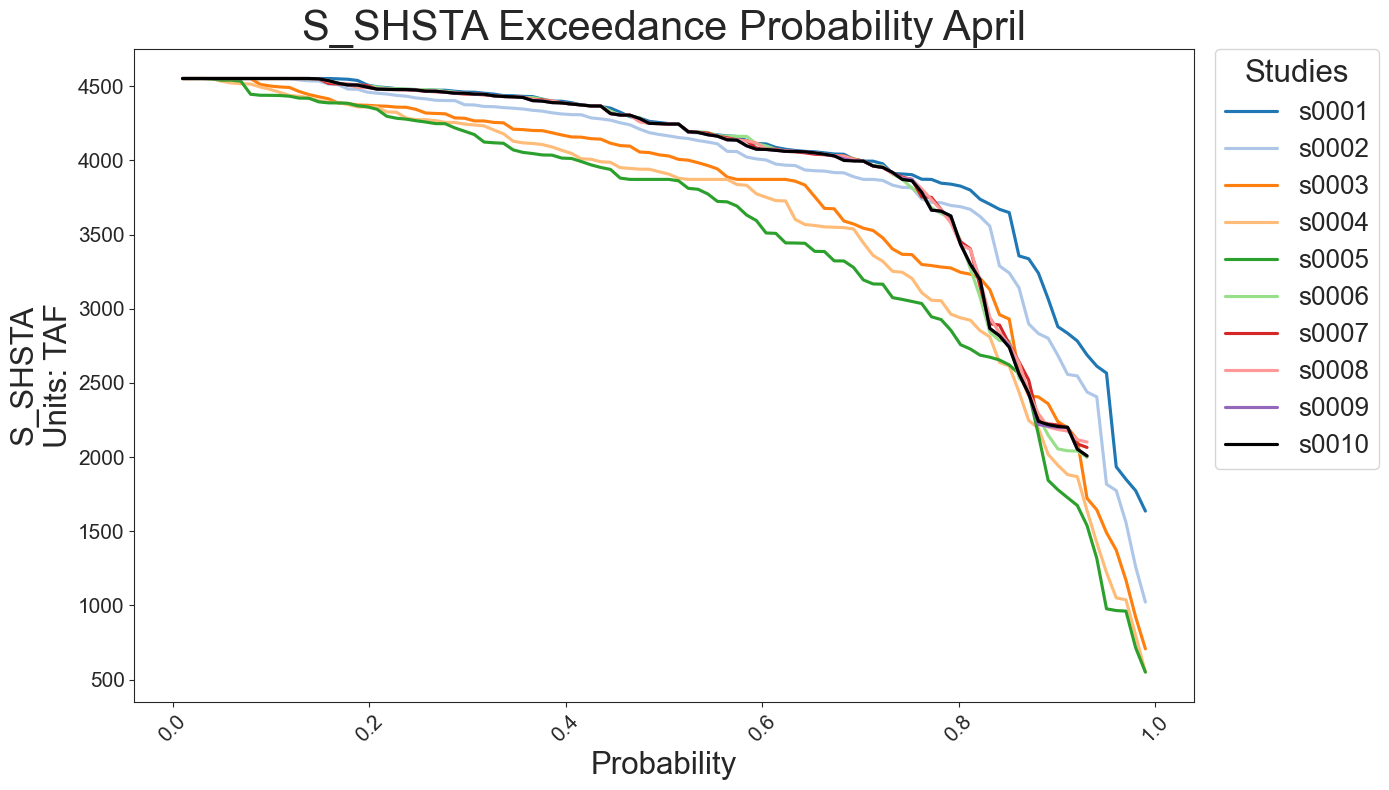

In [78]:
pu.plot_exceedance(shasta_ann_apr_storage, month = "April", xLab = 'Probability', pTitle = 'Exceedance Probability', lTitle = 'Studies', fTitle = 'Shasta_Apr_Exceed', pSave = True, fPath = plots_path)

### plot DEL_CVP_TOTAL_N Annual totals and MOY average

F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\csPlots.py:1395: FutureWarning: 'A-Sep' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  tmpdict[c] = df.loc[:,c].resample(on).apply(howdict) #[c] #[c] #[c for c in cols]
F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\csPlots.py:1395: FutureWarning: 'A-Sep' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  tmpdict[c] = df.loc[:,c].resample(on).apply(howdict) #[c] #[c] #[c for c in cols]
F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\csPlots.py:1395: FutureWarning: 'A-Sep' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  tmpdict[c] = df.loc[:,c].resample(on).apply(howdict) #[c] #[c] #[c for c in cols]
F:\Dino\COEQWAL_GIT\coeqwal\notebooks\coeqwalpackage\csPlots.py:1395: FutureWarning: 'A-Sep' is deprecated and will be removed in a future version, please use 'YE-SEP' instead.
  tmpdict[c] = df.loc[:,c].resample(on).

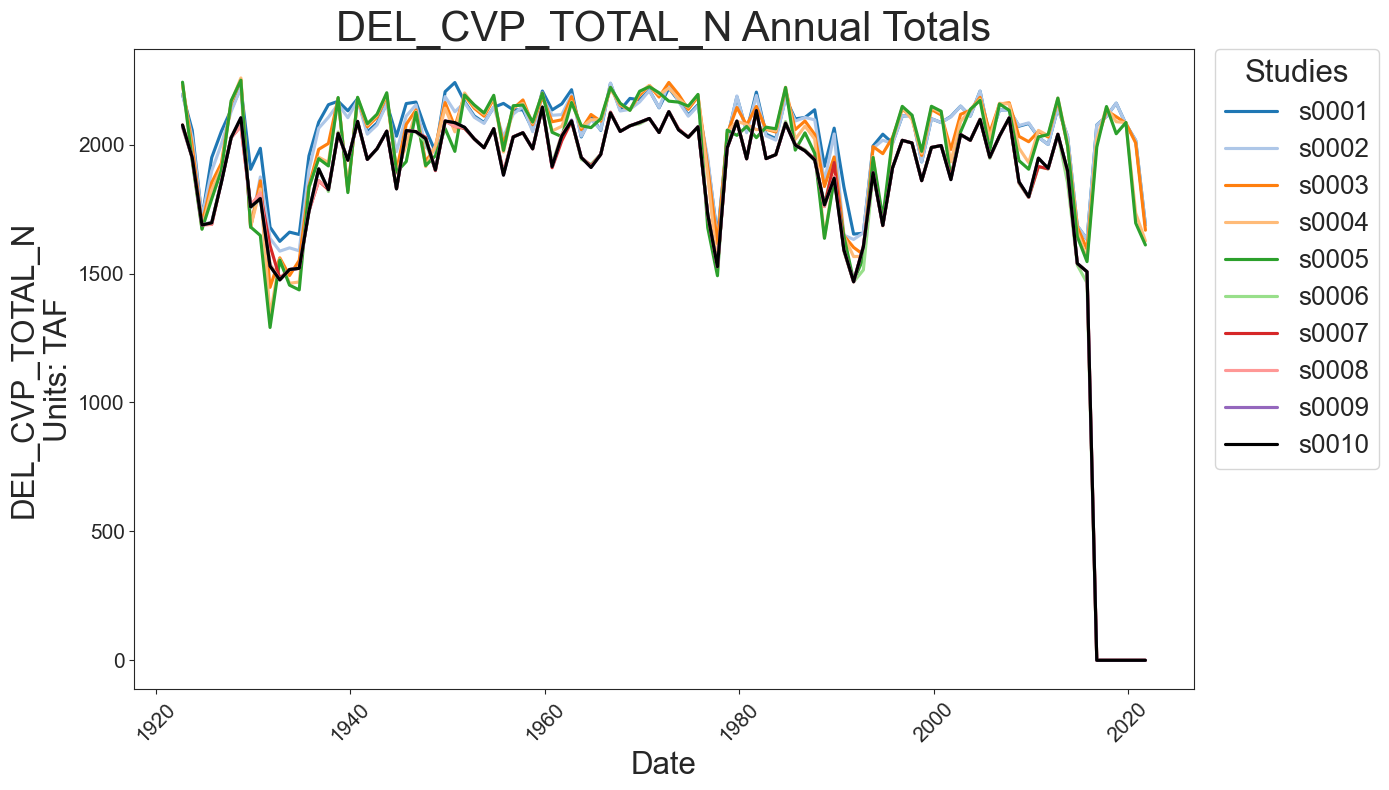

In [83]:
DEL_CVP_TOTAL_N_ann_df = pu.plot_annual_totals(DEL_CVP_TOTAL_N_df, xLab = 'Date', pTitle = 'Annual Totals', lTitle = 'Studies', fTitle = 'DEL_CVP_TOTAL_N_ann_tot', pSave = True, fPath = plots_path)

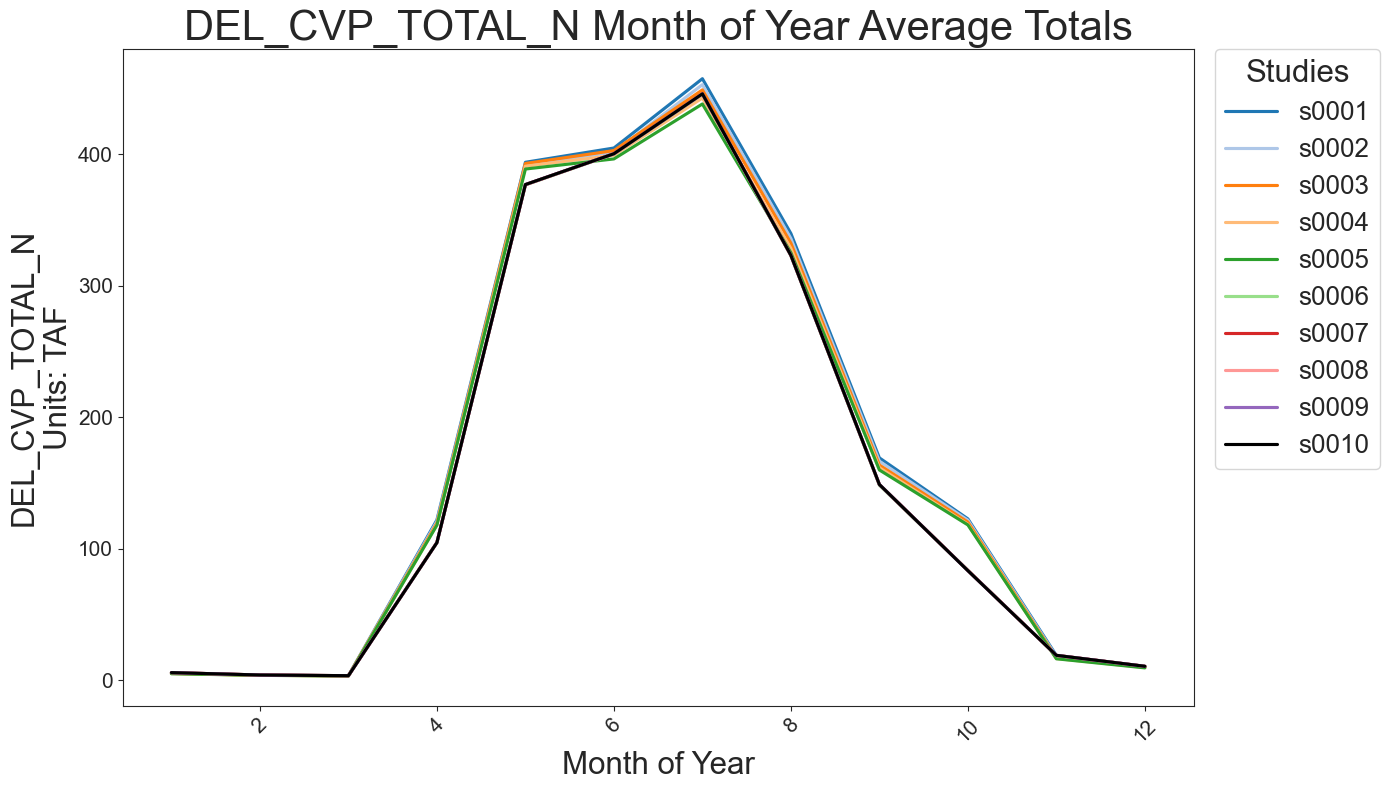

In [85]:
pu.plot_moy_averages(DEL_CVP_TOTAL_N_df, xLab = 'Month of Year', pTitle = 'Month of Year Average Totals', lTitle = 'Studies', fTitle = 'DEL_CVP_TOTAL_N_moy_avg', pSave = True, fPath = plots_path)

## Parallel Plots Examples

In [ ]:
# make parallel plots using "selected_metrics" (TO BE COMPLETED)